### Machine Learning desarrollo práctica final de módulo

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [72]:
# definimos una función para representar el resultado del ajuste
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    #plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

# ejecute esta celda
def miRegresionLineal(x_i,y_i,x,y,degree):
    poly = PolynomialFeatures(degree)
    X_i  = poly.fit_transform(x_i.reshape(-1, 1))
    X_test = poly.fit_transform(x.reshape(-1, 1))
    lr     = LinearRegression().fit(X_i,y_i)
    
    y_hat = lr.predict(X_i)
    fw = lr.predict(X_test)
    
    error_train = np.mean(np.power(y_i-y_hat,2)) 
    error_test  = np.mean(np.power(y-fw,2)) 
    
   # print(lr.coef_)
    
    return fw, error_test, error_train

In [198]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("./Data/airbnb-listings.csv", sep=";", decimal=".")
#airbnb_Data.head().T

In [199]:
#airbnb_Data.describe()
#airbnb_Data.isnull
#airbnb_Data.shape
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 14780 y la dimensionalidad es de 89


In [200]:
# Procedemos a eliminar rows que creemos no son necesarias y que no nos afectarán a la porción que separemos de test.

airbnb_Data.drop(['ID','Listing Url', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description','Experiences Offered'
                  ,'Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules',
                  'Thumbnail Url','Medium Url', 'Picture Url',
                'XL Picture Url', 'Host ID', 'Host URL','Host Name','Host About','Host Thumbnail Url'
                  ,'Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Features',
                 'Host Location','Neighbourhood Cleansed','License','Jurisdiction Names','Host Acceptance Rate'
                 ,'Amenities','Calendar last Scraped','Calendar Updated'],
                 axis=1,inplace=True)

In [201]:
airbnb_Data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Host Since,2013-01-17,2013-12-18,2015-04-06,2015-02-05,2012-03-01,2015-01-03,2016-01-12,2016-06-21,2016-01-12,2016-03-03,2010-05-25,2016-01-12,2016-01-12,2016-11-08,2013-02-19
Host Response Time,within an hour,NaN,within a few hours,within a few hours,within an hour,within a day,within an hour,NaN,within an hour,within a few hours,within an hour,within an hour,within an hour,within an hour,within a day
Host Response Rate,100,NaN,100,100,100,100,99,NaN,99,100,100,99,99,100,90
Host Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Host Total Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Neighbourhood Group Cleansed,NaN,NaN,NaN,Sant Martí,Sarrià-Sant Gervasi,Gràcia,Gràcia,Sarrià-Sant Gervasi,Sants-Montjuïc,Sants-Montjuïc,Eixample,Eixample,Eixample,Eixample,Ciutat Vella
City,Amsterdam,Antwerpen,Austin,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona
State,Noord-Holland,Vlaanderen,TX,Catalunya,"Cataluña, Catalonia",Catalunya,Catalunya,Catalunya,Catalunya,Catalunya,Catalonia,Catalunya,Catalunya,Barcelona,Catalunya
Zipcode,1074 VM,2018,78703,08018,08021,08012,08037,08022,08014,08028,08009,08009,08009,08008,08002
Market,Amsterdam,Antwerp,Austin,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona


In [171]:
airbnb_Data.describe()


,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [190]:
feature_names = airbnb_Data.columns[1:]

In [191]:
feature_names

Index(['Host Response Time', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation

In [197]:
#airbnb_Data["Property Type"].value_counts()
#airbnb_Data["Bed Type"].value_counts()
#Property Type
#Room Type
#Bed Type
#Cancellation Policy
#airbnb_Data["Host Response Time"].value_counts()
airbnb_Data["City"].value_counts()



TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                     41
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                                                                                                                                                                   34
translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                                                                           

In [193]:
# En esta celda, filtraremos las poblaciones que contengan Madrid

#Borramos todos los valores nulo en City
airbnb_Data.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_Data = airbnb_Data[airbnb_Data["City"].str.contains('Madrid', na=False, case=False) ]

#Mostramos un conteo de todos los resultados agrupados por City
airbnb_Data["City"].value_counts()



Madrid                                 13207
Madrid, Comunidad de Madrid, ES           20
madrid                                     8
MADRID                                     2
Aravaca (Madrid)                           1
Chueca, Madrid                             1
Centro, Madrid                             1
Delicias-Madrid                            1
Comunidad de Madrid                        1
las matas  madrid                          1
Madrid, Vallecas (Fontarrón)               1
Madrid, Comunidad de Madrid, ESPANA        1
Name: City, dtype: int64

In [36]:
#airbnb_Data[(airbnb_Data['Bathrooms'].isnull())]['Bathrooms']

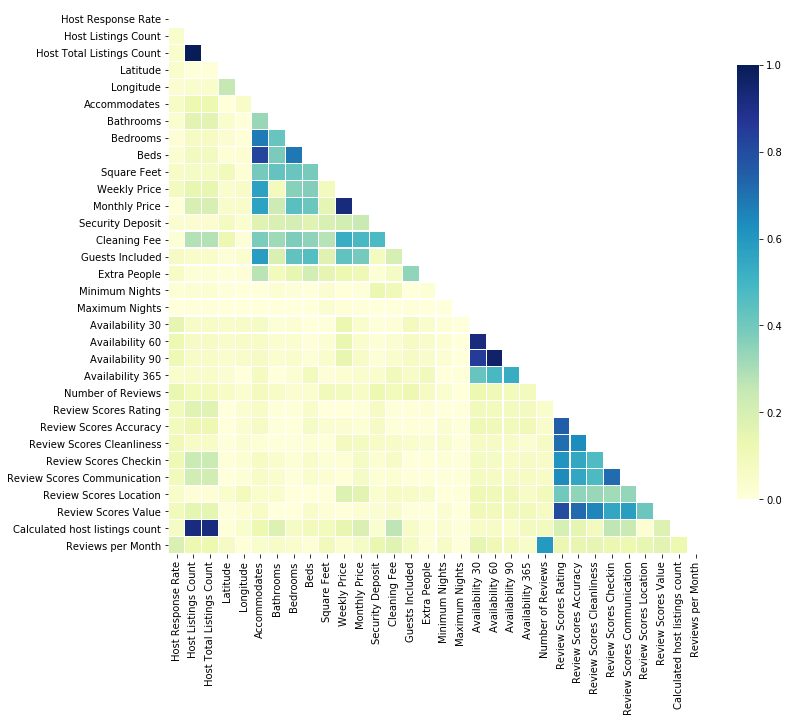

In [159]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)